In [44]:
import sys 
sys.path.append("..")

from torch.utils.data import DataLoader
from dataset import PFamDataset
from protCNN import ProtCNN
DATA_PATH = "../data/"
EMB_PATH = "../data/embeddings/" # embeddings precalculados
SUBSET = "Pfam_v32"
categories = [line.strip() for line in open(f"{DATA_PATH}categories_{SUBSET}_filtered.txt")]

DEVICE = "cuda"
WINDOW_LEN = 256
LR = 5e-4
NEPOCH = 500
PATIENCE = 10
NWORKERS = 8
BATCH_SIZE = 32
ONLY_SEEDS = True # if false, use seeds and full labels
SUBSET="Pfam_v32_lt1024AA_seed"

partition = "test"

test_data_labelwin32 = PFamDataset(f"{DATA_PATH}{SUBSET}_{partition}_filtered.csv",
                        EMB_PATH, categories, win_len=WINDOW_LEN, label_win_len=32,
                        only_seeds=ONLY_SEEDS, is_training=False)
test_loader_labelwin32 = DataLoader(test_data_labelwin32, batch_size=BATCH_SIZE, num_workers=1)

test_data_labelwin256 = PFamDataset(f"{DATA_PATH}{SUBSET}_{partition}_filtered.csv",
                        EMB_PATH, categories, win_len=WINDOW_LEN, label_win_len=256,
                        only_seeds=ONLY_SEEDS, is_training=False)
test_loader_labelwin256 = DataLoader(test_data_labelwin256, batch_size=BATCH_SIZE, num_workers=1)

In [45]:
import pandas as pd
dataset = pd.read_csv(f"{DATA_PATH}{SUBSET}_{partition}_filtered.csv")

dataset.groupby("PID").count().sort_values("Seed", ascending=True).tail(10)

,Unnamed: 0,Inicio,Fin,PF,Seed
PID,,,,,
GLYG1_SOYBN,2,2,2,2,2
D4H6F7_DENA2,2,2,2,2,2
GLYG4_SOYBN,2,2,2,2,2
Q885G6_PSESM,2,2,2,2,2
Q96XJ0_SULTO,2,2,2,2,2
Q9FEC5_SOYBN,2,2,2,2,2
Q65D97_BACLD,2,2,2,2,2
A7HSU1_PARL1,2,2,2,2,2
Q2W505_MAGSA,2,2,2,2,2


In [65]:
import os 
for PID in dataset.PID.unique():
    if os.path.isfile(f"../PFam_esm_half/{PID}.pk"):
        emb = pickle.load(open(f"../PFam_esm_half/{PID}.pk", "rb")).squeeze().float()
        if emb.shape[1]>700:
    
            print(PID)
        
        

T1JH91_STRMM
Q6FM62_CANGA
G0GCY0_SPITZ
F5YG81_TREAZ


In [42]:
import torch as tr 

net_labelwin32 = ProtCNN(len(categories), lr=LR, device=DEVICE)
net_labelwin32.load_state_dict(tr.load("../results_Pfam_v32_softlabels_only_seeds_lr1e-06_256_labelwin32_2024-04-10 10:44:27.367504_model_0/weights.pk"))
net_labelwin32.eval();

net_labelwin256 = ProtCNN(len(categories), lr=LR, device=DEVICE)
net_labelwin256.load_state_dict(tr.load("../results_Pfam_v32_softlabels_only_seeds_lr1e-06_256_labelwin256_2024-03-29 16:54:11.024311_model_0/weights.pk"))
net_labelwin256.eval();


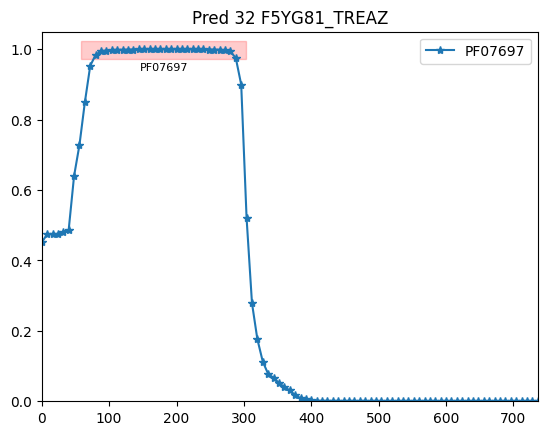

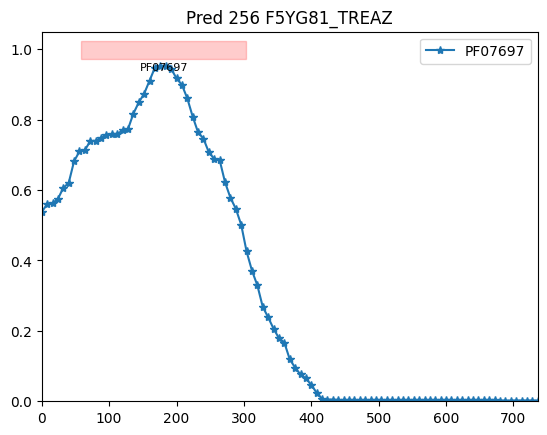

In [69]:
from utils import predict
import pickle 
from utils import plot_domains

PID = "F5YG81_TREAZ"
emb = pickle.load(open(f"../PFam_esm_half/{PID}.pk", "rb")).squeeze().float()


centers, pred32 = predict(net_labelwin32, emb, WINDOW_LEN, use_softmax=True)
centers, pred256 = predict(net_labelwin256, emb, WINDOW_LEN, use_softmax=True)

plot_domains(centers, categories, dataset[dataset.PID == PID].sort_values(by="Inicio"), title=f"Pred 32 {PID}", pred=pred32)
plot_domains(centers, categories, dataset[dataset.PID == PID].sort_values(by="Inicio"), title=f"Pred 256 {PID}", pred=pred256)


debe estar fal